## LAMMPS Walker Basic Usage

In this notebook, we will highlight some examples of how the LAMMPS Walker API implementation can be used.

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

# import the LAMMPS walker binding
from walker_api import lammps_walker

# instantiate a copy using the example input script
walker = lammps_walker.Lammps("input.diala", None)

The underlying model for the alanine dipeptide in vacuum is specificed in the "input.diala" file. This input file is read by LAMMPS's own command parser, so it should be written as a standard LAMMPS input file.

You can use the API routines to interrogate certain properties of the model, such as returning an array of the positions currently stored, or the coordinates of some collective variables which are implemented as LAMMPS computes. 

The following script generates a time-series of the phi dihedral angle for the alanine dipeptide in vacuum.

(-180, 180)

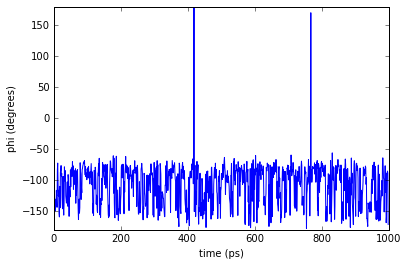

In [10]:
# get an array of the initial position
initial_position = walker.get_position()
initial_time = walker.get_time()

# remove any set walker collective variables
walker.destroy_colvars()

# add the phi dihedral with name "phi"
walker.add_colvars("phi", "dihedral", [5,7,9,15])

colvars = []

# now we'll sample the phi dihedral
for i in range(1000):
    
    # move the walker forward in time
    walker.propagate(1000)
    
    # record the value of the phi dihedral
    cv = walker.get_colvars()
    colvars.append(cv)
    
    
# plot the timeseries
plt.plot(colvars)
plt.xlabel("time (ps)")
plt.ylabel("phi (degrees)")
plt.ylim([-180, 180])